In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
t1 = dt.datetime.now()
# import libraries
pd.set_option('display.max_columns', None)
# https://www.kaggle.com/code/rtatman/datasets-for-regression-analysis/notebook

In [2]:
weatherStations = pd.read_csv("./Weather Station Locations.csv")
weatherStations.head()

,STA,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [3]:
condition = pd.read_csv("./Summary of Weather.csv")
condition.head()

/var/folders/ld/h29r9lq12638xfpl76kpcfq00000gn/T/ipykernel_15982/1428465486.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  condition = pd.read_csv("./Summary of Weather.csv")


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#merge 2 data sets

output = pd.merge(weatherStations,condition,on="STA",how="inner").dropna(axis=1,how="all")
output.head()

,STA,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,PGT,TSHDSBRSGF
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.65,1943-3-11,0,NaN,15.555556,2.777778,8.888889,0.0,NaN,43,3,11,NaN,NaN,NaN,60.0,37.0,48.0,0.0,NaN,NaN,NaN
1,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.65,1943-3-12,0,NaN,12.777778,4.444444,8.888889,0.0,NaN,43,3,12,0,NaN,NaN,55.0,40.0,48.0,0.0,NaN,NaN,NaN
2,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.65,1943-3-13,0,NaN,17.222222,2.777778,10.000000,0.0,NaN,43,3,13,NaN,NaN,NaN,63.0,37.0,50.0,0.0,NaN,NaN,NaN
3,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.65,1943-3-14,0,NaN,10.000000,7.222222,8.888889,0.0,NaN,43,3,14,NaN,NaN,NaN,50.0,45.0,48.0,0.0,NaN,NaN,NaN
4,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.65,1943-3-15,0,NaN,14.444444,5.555556,10.000000,0.0,NaN,43,3,15,0,NaN,NaN,58.0,42.0,50.0,0.0,NaN,NaN,NaN


In [5]:
clean_data = output.iloc[:,:25].drop(["Precip","WindGustSpd","Snowfall","PoorWeather","PRCP","DR","SPD"],axis=1)
clean_data

,STA,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude,Date,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.65,1943-3-11,15.555556,2.777778,8.888889,43,3,11,60.0,37.0,48.0
1,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.65,1943-3-12,12.777778,4.444444,8.888889,43,3,12,55.0,40.0,48.0
2,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.65,1943-3-13,17.222222,2.777778,10.000000,43,3,13,63.0,37.0,50.0
3,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.65,1943-3-14,10.000000,7.222222,8.888889,43,3,14,50.0,45.0,48.0
4,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.65,1943-3-15,14.444444,5.555556,10.000000,43,3,15,58.0,42.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,15027,WARRINGTON,UK,5323N,00239W,27,53.383333,-2.05,1945-10-18,12.222222,5.000000,8.333333,45,10,18,54.0,41.0,47.0
119036,15027,WARRINGTON,UK,5323N,00239W,27,53.383333,-2.05,1945-10-19,15.555556,9.444444,12.222222,45,10,19,60.0,49.0,54.0
119037,15027,WARRINGTON,UK,5323N,00239W,27,53.383333,-2.05,1945-10-20,15.555556,7.222222,11.111111,45,10,20,60.0,45.0,52.0
119038,15027,WARRINGTON,UK,5323N,00239W,27,53.383333,-2.05,1945-10-21,17.222222,12.222222,14.444444,45,10,21,63.0,54.0,58.0


In [6]:
# perform one hot encode and feature scaling
from sklearn.model_selection import train_test_split
X = clean_data['MinTemp']
y = clean_data['MaxTemp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mse","mae"]
)
callback = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3)
model.fit(X_train,y_train, epochs=100,callbacks=[callback])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/100


2022-07-01 01:18:25.245195: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-01 01:18:25.245339: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-01 01:18:25.295950: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  27/2976 [..............................] - ETA: 11s - loss: 334.0741 - mse: 334.0741 - mae: 17.4579 

2022-07-01 01:18:25.472804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2976/2976 [==============================] - 11s 4ms/step - loss: 29.9766 - mse: 29.9766 - mae: 4.0086
Epoch 2/100
2976/2976 [==============================] - 11s 4ms/step - loss: 17.3854 - mse: 17.3854 - mae: 3.1899
Epoch 3/100
2976/2976 [==============================] - 11s 4ms/step - loss: 17.3842 - mse: 17.3842 - mae: 3.1880
Epoch 4/100
2976/2976 [==============================] - 11s 4ms/step - loss: 17.3818 - mse: 17.3818 - mae: 3.1871
Epoch 5/100
2976/2976 [==============================] - 11s 4ms/step - loss: 17.3859 - mse: 17.3859 - mae: 3.1879
Epoch 6/100
2976/2976 [==============================] - 11s 4ms/step - loss: 17.3849 - mse: 17.3849 - mae: 3.1888
Epoch 7/100
2976/2976 [==============================] - 11s 4ms/step - loss: 17.3763 - mse: 17.3763 - mae: 3.1879
Epoch 8/100
2976/2976 [==============================] - 11s 4ms/step - loss: 17.3752 - mse: 17.3752 - mae: 3.1877
Epoch 9/100
2976/2976 [==============================] - 11s 4ms/step - loss: 17.3877 - mse:

In [8]:
model.evaluate(X_test,y_test)

 50/744 [=>............................] - ETA: 2s - loss: 17.0763 - mse: 17.0763 - mae: 3.2311

2022-07-01 01:20:56.639620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


744/744 [==============================] - 2s 3ms/step - loss: 17.7396 - mse: 17.7396 - mae: 3.2605


[17.739599227905273, 17.739599227905273, 3.2604596614837646]

103/744 [===>..........................] - ETA: 0s

2022-07-01 01:20:58.962373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


744/744 [==============================] - 1s 1ms/step


/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


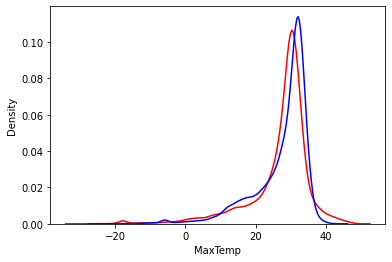

In [9]:
y_pred = model.predict(X_test)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.show()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 20)                  40        
                                                                 
 dense_1 (Dense)             (32, 1)                   21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [11]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

4.211842414762295

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7690621113128683

In [13]:
t2 = dt.datetime.now()

print(t2-t1)

0:02:35.681959


In [18]:
model.predict([21])

1/1 [==============================] - 0s 17ms/step


array([[30.39976]], dtype=float32)